# Importing Libraries:

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics

# Loading Dataset and Exploration:

In [22]:
df = pd.read_csv('car data.csv')

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
# Checking the number of rows and columns
df.shape

(301, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
# Checking for missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
# Checking for distribution of categorical data
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [28]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [29]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [30]:
# Encoding the Categorical Data
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Model Building:

In [32]:
# Splitting the data into Training and Testing Data
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [33]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Linear Regression:

In [35]:
# Model Training:
lf = LinearRegression()
lf.fit(X_train,y_train)

LinearRegression()

In [38]:
# Evaluation on Training Data
train_pred = lf.predict(X_train)

#R squared Error
error_score = metrics.r2_score(y_train,train_pred)
print('R squared Error:',error_score)

R squared Error: 0.8843647367786595


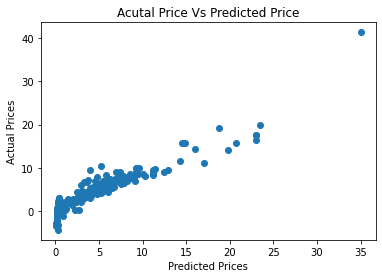

In [39]:
# Visualizing the Actual Prices and Predicted Prices
plt.scatter(y_train,train_pred)
plt.ylabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title("Acutal Price Vs Predicted Price")
plt.show()

In [40]:
# Evaluation on Test Data
y_pred = lf.predict(X_test)

#R squared Error
error_score = metrics.r2_score(y_test,y_pred)
print('R squared Error:',error_score)

R squared Error: 0.8434932173888492


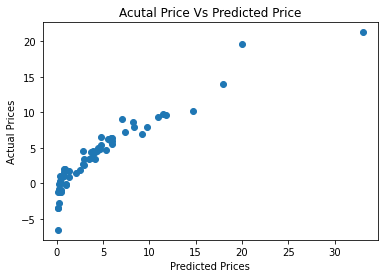

In [41]:
# Visualizing the Actual Prices and Predicted Prices
plt.scatter(y_test,y_pred)
plt.ylabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title("Acutal Price Vs Predicted Price")
plt.show()

## Lasso Regression:

In [42]:
# Lasso Regression:
# Model Training:
ll = Lasso()
ll.fit(X_train,y_train)

Lasso()

In [49]:
# Evaluation on Training Data
train_pred = ll.predict(X_train)

#R squared Error
error_score = metrics.r2_score(y_train,train_pred)
print('R squared Error:',error_score)

R squared Error: 0.8424684224488146


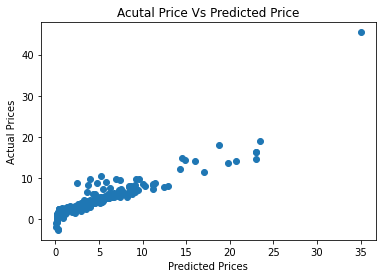

In [50]:
# Visualizing the Actual Prices and Predicted Prices
plt.scatter(y_train,train_pred)
plt.ylabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title("Acutal Price Vs Predicted Price")
plt.show()

In [47]:
# Evaluation on Test Data
y_pred = ll.predict(X_test)

#R squared Error
error_score = metrics.r2_score(y_test,y_pred)
print('R squared Error:',error_score)

R squared Error: 0.8020492662138775


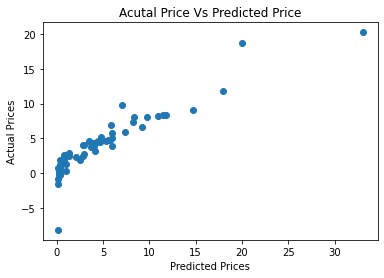

In [48]:
# Visualizing the Actual Prices and Predicted Prices
plt.scatter(y_test,y_pred)
plt.ylabel('Actual Prices')
plt.xlabel('Predicted Prices')
plt.title("Acutal Price Vs Predicted Price")
plt.show()